In [1]:
%matplotlib inline
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Mekanika kuantum untuk sistem qubit-osilator terkopel sederhana

Pada kasus standar untuk optika kuantum sistem yang ditinjau terdiri dari 2 sistem yang saling berinterkasi seperti pada gambar berikut:

<img src="Picture2.png" width="500"/>

Berikut merupakan bentuk Hamiltonian dari sistem tersebut:

$H=H_{a}+H_{f}+H_{int}$

dimana $H_{a}$ merupakan Hamiltonian dari atom, $H_{f}$ merupakan Hamiltonian medan dan $H_{init}$ merupakan Hamiltonian interaksi antara atom-medan.

Berdasarkan model Jaynes-Cumming untuk sistem seperti pada gambar diatas, akan memeiliki ungkapan Hamiltonian sebagai berikut:

$H=\frac{1}{2}\hbar\omega_{a}\hat{\sigma}_{3} + \hbar\omega_{f}\hat{a}^{\dagger}\hat{a} + \hbar g(\hat{\sigma}_{+}+\hat{\sigma}_{-})(\hat{a}+\hat{a}^{\dagger})$

dengan $\hat{\sigma}_{3}=\ket{e}\bra{e} - \ket{g}\bra{g}$, $\hat{a}^{\dagger}$ merupakan oprator *creation*, $\hat{a}$ merupakan oprator *annihilation*, $g$ merupakan kuat interaksi antara atom dan medan, $\hat{\sigma}_{+}=\ket{e}\bra{g}$ dan $\hat{\sigma}_{-}=\ket{g}\bra{e}$. 

Ungkapan Hamiltonian dari model Jaynes-Cumming tersebut dapat disederhanakan dengan menggunkan RWA atau *the rotating-wave approximation* sebagai berikut:

$H=\frac{1}{2}\hbar\omega_{a}\hat{\sigma}_{3} + \hbar\omega_{f}\hat{a}^{\dagger}\hat{a} + \hbar g(\hat{\sigma}_{+}\hat{a}+\hat{\sigma}_{-}\hat{a}^\dagger)$

## Mendefinisika parameter, operator & Hamiltonian

In [2]:
wc = 1.0*2*np.pi     #frekuensi medan
wa = 1.0*2*np.pi     #frekuensi atom
g = 0.05*2*np.pi     #kuat interaksi
N = 15               #jumlah n medan
use_rwa = False
tlist = np.linspace(0,25,101)

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

#Suku Hamiltonian atom & medan
H0 = wc*a.dag()*a + wa*sm.dag()*sm

#Suku Hamiltonian interaksi (tanpa g)
if use_rwa:
    H1 = (a.dag()*sm + a*sm.dag())
else:
    H1 = (a.dag() + a)*(sm + sm.dag())

## Probabilitas okupasi sebagai fungsi kuat interaksi


Probabilitas okupasi atom : $\bra{\Psi}\hat{\sigma}_{+}\hat{\sigma}_{-}\ket{\Psi}$

Probabilitas okupasi medan : $\bra{\Psi}\hat{a}^{\dagger}\hat{a}\ket{\Psi}$

In [3]:
g_list = np.linspace(0, 2.0, 101)*2*np.pi # Kuat interaksi
psi_list = []
E_list = []

# Keadaan
na = sm.dag()*sm  # atom
nc = a.dag()*a    # medan

for g in g_list:
    # Hamiltonian total
    H = H0 + g*H1
    
    # menghitung ground state & energinya
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)
    E_list.append(gnd_energy)

na_expt = expect(na, psi_list) # probabilitas okupasi atom
nc_expt = expect(nc, psi_list) # probabilitas okupasi medan

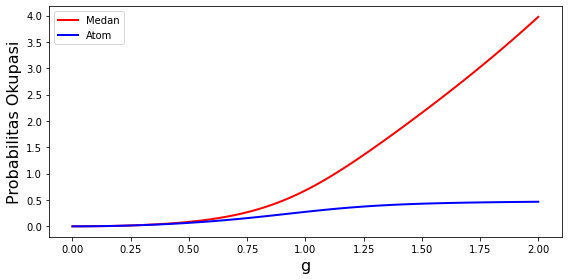

In [4]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_list/(2*np.pi), nc_expt, 'r', linewidth=2, label="Medan")
axes.plot(g_list/(2*np.pi), na_expt, 'b', linewidth=2, label="Atom")
axes.set_ylabel("Probabilitas Okupasi", fontsize=16)
axes.set_xlabel("g", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()

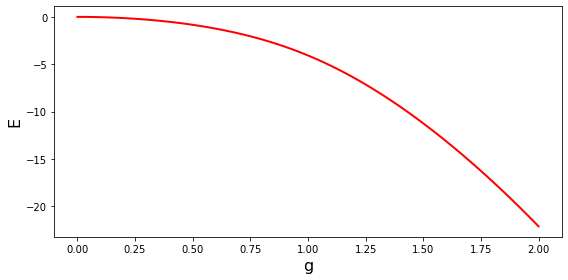

In [5]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_list/(2*np.pi), E_list, 'r', linewidth=2)
axes.set_ylabel("E", fontsize=16)
axes.set_xlabel("g", fontsize=16)

fig.tight_layout()

In [6]:
E_list

[0.0,
 -0.0012567627377087932,
 -0.005028559669287306,
 -0.011319921473983337,
 -0.020138414363201983,
 -0.03149466269808369,
 -0.04540238064846483,
 -0.061878412882070494,
 -0.08094278426021329,
 -0.10261875849806426,
 -0.12693290571950333,
 -0.1539151787984695,
 -0.1835989983265811,
 -0.21602134597928035,
 -0.251222865965377,
 -0.28924797413575387,
 -0.33014497419052563,
 -0.37396618025728245,
 -0.4207680449109646,
 -0.47061129146323233,
 -0.5235610490612526,
 -0.5796869887970346,
 -0.6390634586342121,
 -0.7017696145047467,
 -0.7678895444106896,
 -0.8375123817842532,
 -0.9107324037142662,
 -0.9876491089439776,
 -1.0683672697942934,
 -1.1529969513839577,
 -1.2416534907305334,
 -1.334457427556552,
 -1.4315343779421599,
 -1.5330148414182512,
 -1.6390339317567337,
 -1.7497310216734154,
 -1.8652492920144672,
 -1.985735176853518,
 -2.111337697391974,
 -2.2422076797250634,
 -2.378496854486551,
 -2.5203568401506553,
 -2.6679380163288693,
 -2.8213882986578667,
 -2.9808518326456497,
 -3.146467

## Plot Wigner function sebagai fungsi kuat interaksi $g$ 

In [7]:
g_idx = np.where([g_list == 2*np.pi*g for g in [0.0, 0.5, 1.0, 1.5, 2.0]])[1]
len(g_idx)

5

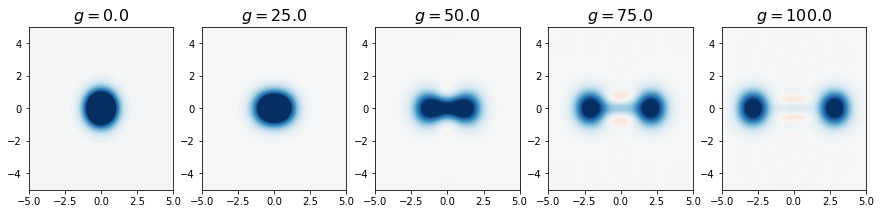

In [8]:
xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(1,len(g_idx), sharex=True, figsize=(3*len(g_idx),3))
i = 0
for idx, psi in enumerate(psi_list):
    if idx == g_idx[i]:
        # menghitung densitas matriks
        rho_cavity = ptrace(psi, 0)
        
        # menghitung wigner function
        W = wigner(rho_cavity, xvec, xvec)
        
        # plot wigner function
        axes[i].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
        axes[i].set_title(r"$g = %.1f$" % g_idx[i], fontsize=16)
        i += 1

## Entropy

In [9]:
entropy_cavity = np.zeros(shape(g_list))
entropy_atom = np.zeros(shape(g_list))

In [10]:
for idx, psi in enumerate(psi_list):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
    # menghitung entropy medan
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)
    # menghitung rapat atom
    rho_atom = ptrace(psi, 1)
    # menghitung entropy atom
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)

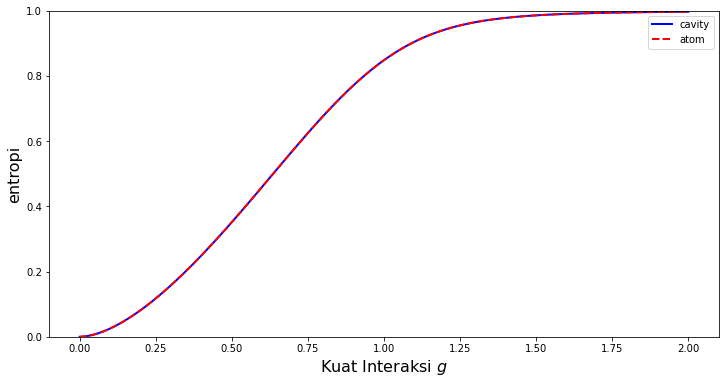

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(g_list/(2*np.pi), entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(g_list/(2*np.pi), entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylim(0,1)
axes.set_ylabel("entropi", fontsize=16)
axes.set_xlabel("Kuat Interaksi $g$", fontsize=16)
axes.legend(loc=0)